In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
df=pd.read_csv("Churn.csv")
df.head(3)
df=df.drop(columns=["customerID","StreamingTV"])
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')




In [3]:
df.isnull().sum()
df=df.dropna()

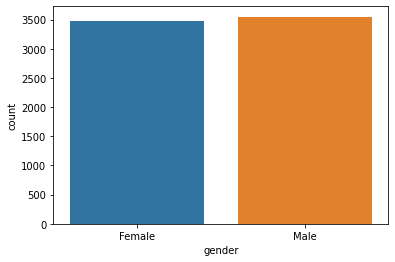

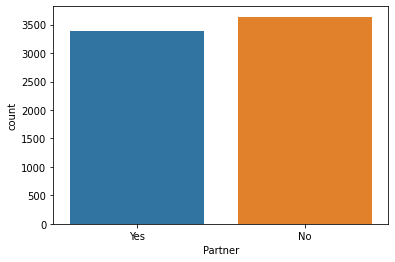

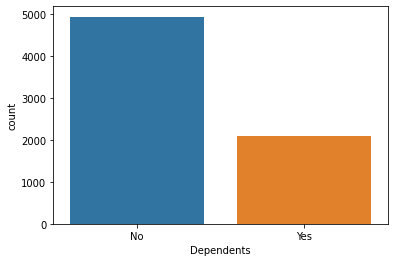

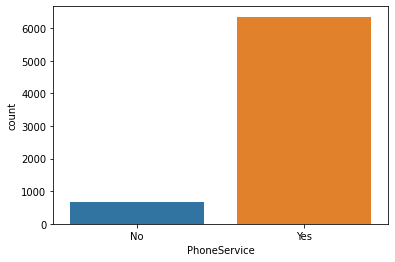

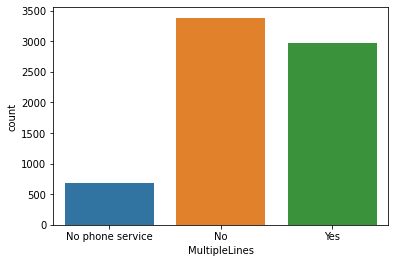

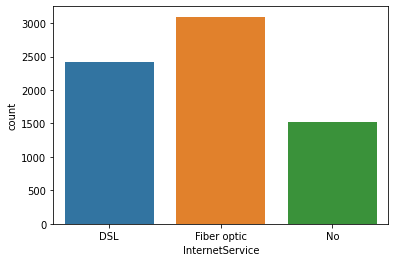

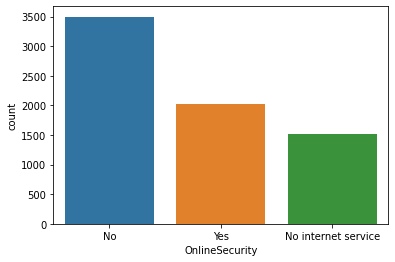

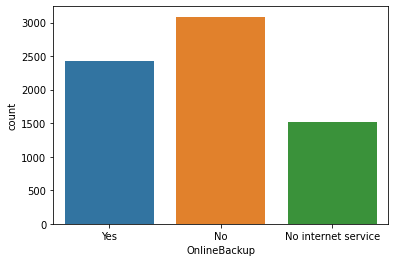

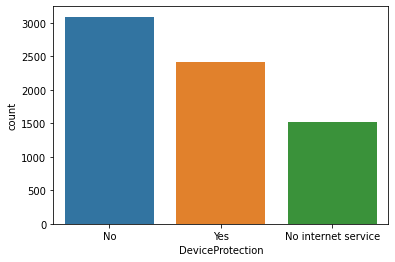

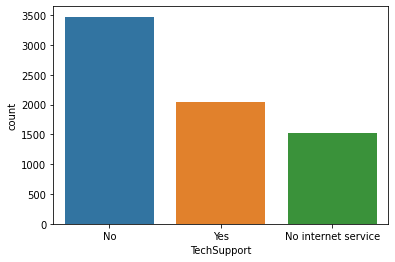

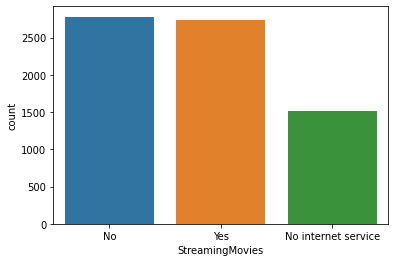

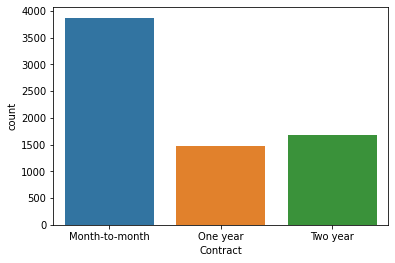

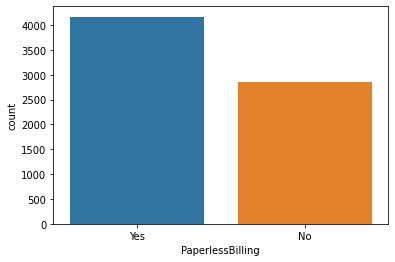

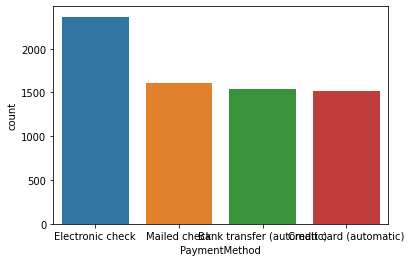

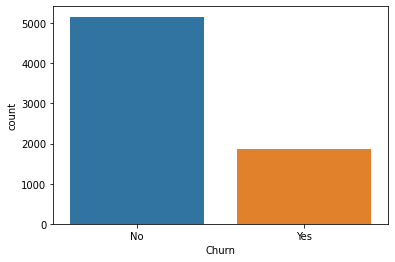

In [4]:
######For plotting all categorical variables
for i, col in enumerate(df.select_dtypes('object')):
    plt.figure(i)
    sns.countplot(x=col, data=df)


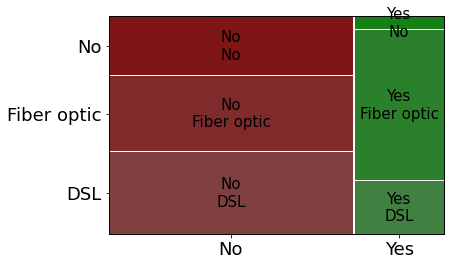

In [5]:
from statsmodels.graphics.mosaicplot import mosaic
plt.rcParams['font.size'] = 18
mosaic(df, ['Churn', 'InternetService']);
#People having fibre optic have churned the most

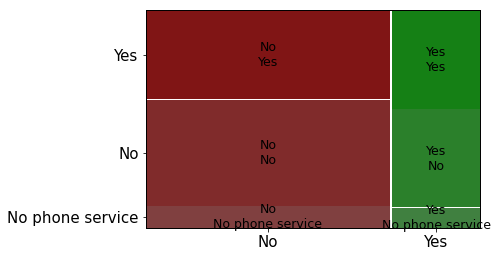

In [6]:
plt.rcParams['font.size'] = 15
mosaic(df, ['Churn', 'MultipleLines']);
                               


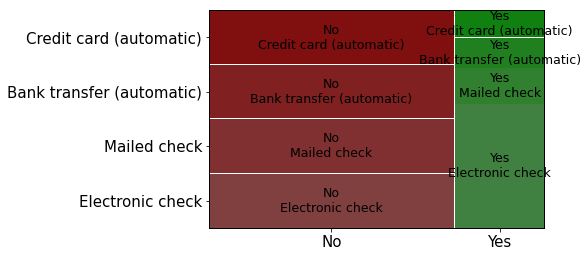

In [7]:
plt.rcParams['font.size'] = 15
mosaic(df, ['Churn', 'PaymentMethod']);

In [8]:
df.StreamingMovies.value_counts()
#For Paper less Billing
df.loc[df.StreamingMovies== 'No internet service','StreamingMovies'] = 'No' 
df.loc[df.OnlineBackup== 'No internet service','OnlineBackup'] = 'No' 
df.loc[df.OnlineSecurity== 'No internet service','OnlineSecurity'] = 'No' 
df.loc[df.DeviceProtection== 'No internet service','DeviceProtection'] = 'No'
df.loc[df.TechSupport== 'No internet service','TechSupport'] = 'No'
df.loc[df.Churn== 'No','Churn'] = 0
df.loc[df.Churn== 'Yes','Churn'] = 1
x=df.drop(columns=["Churn"], axis=1)
y=df["Churn"]
#Checking the function
df.StreamingMovies.value_counts()

No     4301
Yes    2731
Name: StreamingMovies, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [10]:
x_train = pd.get_dummies(x_train,columns=x_train.select_dtypes(include=['object']).columns,drop_first=True)
x_test = pd.get_dummies(x_test,columns=x_test.select_dtypes(include=['object']).columns,drop_first=True)

In [11]:

X_train, X_test, Y_train, Y_test= x_train.values, x_test.values, y_train.values, y_test.values

In [12]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
# To scale data 

X_train=scaler.fit_transform(x_train)
X_test=scaler.fit_transform(x_test) 

In [42]:
ann=tf.keras.models.Sequential()

In [43]:
ann.add(tf.keras.layers.Dense(units=9,activation='relu'))

In [44]:
ann.add(tf.keras.layers.Dense(units=9,activation='relu'))

Output layer


In [45]:
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [46]:
ann.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [47]:
X=np.asarray(X_train).astype(np.float32) 
Y=np.asarray(Y_train).astype(np.float32)


ann.fit(X, Y, batch_size=32, epochs=100)


Epoch 1/100
176/176 [==============================] - 0s 1ms/step - loss: 0.5401 - accuracy: 0.7232
Epoch 2/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4583 - accuracy: 0.7712
Epoch 3/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4417 - accuracy: 0.7851
Epoch 4/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4353 - accuracy: 0.7886
Epoch 5/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4315 - accuracy: 0.7902
Epoch 6/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4285 - accuracy: 0.7908
Epoch 7/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4255 - accuracy: 0.7947
Epoch 8/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4232 - accuracy: 0.7943
Epoch 9/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4214 - accuracy: 0.7964
Epoch 10/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4200 - accura

In [48]:
y_pred = ann.predict(X_test)

In [49]:
a=[]
for i in range(0,len(y_pred)):
  if y_pred[i]>0.5:
    a.append(1)
  else:
    a.append(0)


In [50]:
Y_test=np.asarray(Y_test).astype(np.float32)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, a) 
print(cm)
accuracy_score(Y_test, a)


[[932 106]
 [186 183]]


0.7924662402274343